In [1]:
# Imports
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import hvplot.pandas
import numpy as np


## Part 1: 
## Fetch the data from yfinance

In [2]:
# Import the dataset from yfinance
stock_symbol_BTC = "BTC-USD"  # Change this to the desired stock symbol
stock_symbol_ETH = "ETH-USD"  # Change this to the desired stock symbol
stock_symbol_BNB = "BNB-USD"  # Change this to the desired stock symbol
stock_symbol_XRP = "XRP-USD"  # Change this to the desired stock symbol
index_symbol_us10 = "^TNX"
# Calculate the start and end dates for the past 3 years
end_date = datetime.today().date()
start_date = end_date - timedelta(days=3*365)  # 3 years * 365 days

# Fetch historical price data
stock_data_BTC = yf.download(stock_symbol_BTC, start=start_date, end=end_date)
stock_data_ETH = yf.download(stock_symbol_ETH, start=start_date, end=end_date)
stock_data_BNB = yf.download(stock_symbol_BNB, start=start_date, end=end_date)
stock_data_XRP = yf.download(stock_symbol_XRP, start=start_date, end=end_date)
index_data_us10 = yf.download(index_symbol_us10, start=start_date, end=end_date)
# Print the retrieved data
print(stock_data_BTC)
print(stock_data_ETH)
print(stock_data_BNB)
print(stock_data_XRP) 
print(index_data_us10)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
                    Open          High           Low         Close  \
Date                                                                 
2020-10-18  11355.982422  11483.359375  11347.578125  11483.359375   
2020-10-19  11495.038086  11799.092773  11408.290039  11742.037109   
2020-10-20  11745.974609  11999.917969  11681.480469  11916.334961   
2020-10-21  11913.077148  13184.566406  11900.928711  12823.689453   
2020-10-22  12801.635742  13161.593750  12717.093750  12965.891602   
...                  ...           ...           ...           ...   
2023-10-13  26752.878906  27092.697266  26686.322266  26862.375000   
2023-10-14  26866.203125 

In [3]:
Combined_df = pd.concat([stock_data_BTC.Close,stock_data_ETH.Close,stock_data_BNB.Close,stock_data_XRP.Close],axis=1)
Combined_df.columns=['BTC','ETH','BNB','XRP']
Combined_df

,BTC,ETH,BNB,XRP
Date,,,,
2020-10-18,11483.359375,378.213684,30.659523,0.242225
2020-10-19,11742.037109,379.935608,29.925068,0.245964
2020-10-20,11916.334961,369.136902,28.803444,0.243573
2020-10-21,12823.689453,392.189972,29.772354,0.251615
2020-10-22,12965.891602,413.772980,30.658192,0.256807
...,...,...,...,...
2023-10-13,26862.375000,1552.089478,206.036118,0.485699
2023-10-14,26861.707031,1555.256836,206.601898,0.486775
2023-10-15,27159.652344,1558.069824,209.742508,0.487846


## Part 2: 

### Normalized data.

In [4]:
df_normalized = Combined_df / Combined_df.iloc[0]
df_normalized 

,BTC,ETH,BNB,XRP
Date,,,,
2020-10-18,1.000000,1.000000,1.000000,1.000000
2020-10-19,1.022526,1.004553,0.976045,1.015436
2020-10-20,1.037705,0.976001,0.939462,1.005565
2020-10-21,1.116719,1.036953,0.971064,1.038766
2020-10-22,1.129103,1.094019,0.999957,1.060200
...,...,...,...,...
2023-10-13,2.339244,4.103737,6.720134,2.005156
2023-10-14,2.339185,4.112111,6.738588,2.009599
2023-10-15,2.365131,4.119549,6.841023,2.014020


In [5]:
df_normalized[['BTC_return','ETH_return','BNB_return','XRP_return']] = Combined_df.pct_change()
df_normalized.dropna().head()

,BTC,ETH,BNB,XRP,BTC_return,ETH_return,BNB_return,XRP_return
Date,,,,,,,,
2020-10-19,1.022526,1.004553,0.976045,1.015436,0.022526,0.004553,-0.023955,0.015436
2020-10-20,1.037705,0.976001,0.939462,1.005565,0.014844,-0.028422,-0.037481,-0.009721
2020-10-21,1.116719,1.036953,0.971064,1.038766,0.076144,0.062451,0.033639,0.033017
2020-10-22,1.129103,1.094019,0.999957,1.060200,0.011089,0.055032,0.029754,0.020635
2020-10-23,1.126111,1.083426,0.999166,1.052241,-0.002649,-0.009682,-0.000790,-0.007508


In [6]:
df_btc = df_normalized[["BTC","BTC_return"]]
df_btc = pd.DataFrame(df_btc)
df_btc.tail()
df_eth = df_normalized[["ETH","ETH_return"]]
df_eth = pd.DataFrame(df_eth)
df_eth.tail()
df_bnb = df_normalized[["BNB","BNB_return"]]
df_bnb = pd.DataFrame(df_bnb)
df_bnb.tail()
df_xrp = df_normalized[["XRP","XRP_return"]]
df_xrp = pd.DataFrame(df_xrp)
df_xrp.tail()

,XRP,XRP_return
Date,,
2023-10-13,2.005156,0.005484
2023-10-14,2.009599,0.002215
2023-10-15,2.014020,0.002200
2023-10-16,2.055845,0.020767
2023-10-17,2.029906,-0.012617


## Part 3: 

### Recreate the SMA trading algorithm using rolling technical indicators from the pandas library.

In [7]:
# Define a window size of 100
short_window = 50

# Create a simple moving average (SMA) using the short_window and assign this to a new columns called sma_fast
df_btc["sma_fast_btc"] = df_normalized["BTC"].rolling(window=short_window).mean().dropna()
df_eth["sma_fast_eth"] = df_normalized["ETH"].rolling(window=short_window).mean().dropna()
df_bnb["sma_fast_bnb"] = df_normalized["BNB"].rolling(window=short_window).mean().dropna()
df_xrp["sma_fast_xrp"] = df_normalized["XRP"].rolling(window=short_window).mean().dropna()

# Define a window size of 200
long_window = 100

# Create a simple moving average (SMA) using the short_window and assign this to a new columns called sma_fast
df_btc["sma_slow_btc"] = df_normalized["BTC"].rolling(window=short_window).mean().dropna()
df_eth["sma_slow_eth"] = df_normalized["ETH"].rolling(window=short_window).mean().dropna()
df_bnb["sma_slow_bnb"] = df_normalized["BNB"].rolling(window=short_window).mean().dropna()
df_xrp["sma_slow_xrp"] = df_normalized["XRP"].rolling(window=short_window).mean().dropna()

df_btc.tail()
df_eth.tail()
df_bnb.tail()
df_xrp.tail()

,XRP,XRP_return,sma_fast_xrp,sma_slow_xrp
Date,,,,
2023-10-13,2.005156,0.005484,2.097793,2.097793
2023-10-14,2.009599,0.002215,2.094534,2.094534
2023-10-15,2.014020,0.002200,2.091592,2.091592
2023-10-16,2.055845,0.020767,2.089456,2.089456
2023-10-17,2.029906,-0.012617,2.086851,2.086851


In [8]:
# Create a new column in the trading_df called signal setting its value to zero.
df_btc["signal"] = 0.0
df_eth["signal"] = 0.0
df_bnb["signal"] = 0.0
df_xrp["signal"] = 0.0
# Create the signal to buy
df_btc.loc[(df_btc["BTC_return"] >= 0), "signal"] = 1
df_eth.loc[(df_eth["ETH_return"] >= 0), "signal"] = 1
df_bnb.loc[(df_bnb["BNB_return"] >= 0), "signal"] = 1
df_xrp.loc[(df_xrp["XRP_return"] >= 0), "signal"] = 1
# Create the signal to sell
df_btc.loc[(df_btc["BTC_return"] < 0), "signal"] = -1
df_eth.loc[(df_eth["ETH_return"] < 0), "signal"] = -1
df_bnb.loc[(df_bnb["BNB_return"] < 0), "signal"] = -1
df_xrp.loc[(df_xrp["XRP_return"] < 0), "signal"] = -1
# Review the DataFrame
display(df_btc.head())
display(df_btc.tail())

,BTC,BTC_return,sma_fast_btc,sma_slow_btc,signal
Date,,,,,
2020-10-18,1.000000,NaN,NaN,NaN,0.0
2020-10-19,1.022526,0.022526,NaN,NaN,1.0
2020-10-20,1.037705,0.014844,NaN,NaN,1.0
2020-10-21,1.116719,0.076144,NaN,NaN,1.0
2020-10-22,1.129103,0.011089,NaN,NaN,1.0


,BTC,BTC_return,sma_fast_btc,sma_slow_btc,signal
Date,,,,,
2023-10-13,2.339244,0.003946,2.319652,2.319652,1.0
2023-10-14,2.339185,-0.000025,2.321070,2.321070,-1.0
2023-10-15,2.365131,0.011092,2.323074,2.323074,1.0
2023-10-16,2.483547,0.050067,2.327306,2.327306,1.0
2023-10-17,2.474515,-0.003637,2.331329,2.331329,-1.0


In [9]:
# Calculate the strategy returns and add them to the signals_df DataFrame
df_btc['Strategy Returns'] = df_btc['BTC_return'] * df_btc['signal'].shift()
df_eth['Strategy Returns'] = df_eth['ETH_return'] * df_eth['signal'].shift()
df_bnb['Strategy Returns'] = df_bnb['BNB_return'] * df_bnb['signal'].shift()
df_xrp['Strategy Returns'] = df_xrp['XRP_return'] * df_xrp['signal'].shift()
df_btc = df_btc.dropna()
df_eth = df_eth.dropna()
df_bnb = df_bnb.dropna()
df_xrp = df_xrp.dropna()

# Review the DataFrame
display(df_btc.head())
display(df_btc.tail())

,BTC,BTC_return,sma_fast_btc,sma_slow_btc,signal,Strategy Returns
Date,,,,,,
2020-12-06,1.684622,0.009966,1.384246,1.384246,1.0,0.009966
2020-12-07,1.671256,-0.007934,1.397671,1.397671,-1.0,-0.007934
2020-12-08,1.595452,-0.045358,1.409129,1.409129,-1.0,0.045358
2020-12-09,1.615722,0.012705,1.420690,1.420690,1.0,-0.012705
2020-12-10,1.590562,-0.015572,1.430167,1.430167,-1.0,-0.015572


,BTC,BTC_return,sma_fast_btc,sma_slow_btc,signal,Strategy Returns
Date,,,,,,
2023-10-13,2.339244,0.003946,2.319652,2.319652,1.0,-0.003946
2023-10-14,2.339185,-0.000025,2.321070,2.321070,-1.0,-0.000025
2023-10-15,2.365131,0.011092,2.323074,2.323074,1.0,-0.011092
2023-10-16,2.483547,0.050067,2.327306,2.327306,1.0,0.050067
2023-10-17,2.474515,-0.003637,2.331329,2.331329,-1.0,-0.003637


<Axes: xlabel='Date'>

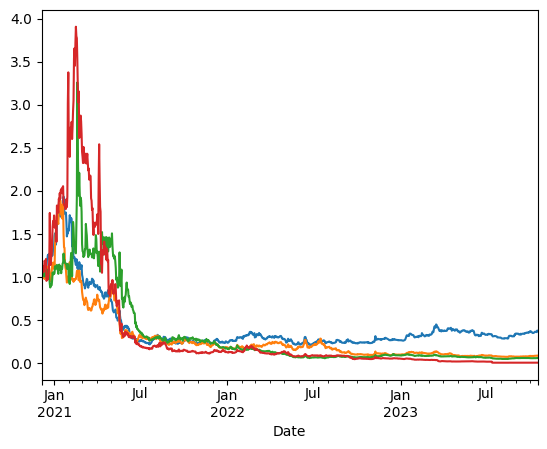

In [10]:
# Plot Strategy Returns to examine performance
(1 + df_btc['Strategy Returns']).cumprod().plot()
(1 + df_eth['Strategy Returns']).cumprod().plot()
(1 + df_bnb['Strategy Returns']).cumprod().plot()
(1 + df_xrp['Strategy Returns']).cumprod().plot()

## Part 4
### Create the feature and target sets

In [11]:
X_btc = df_btc[["sma_fast_btc", "sma_slow_btc"]].shift().dropna()
X_eth = df_eth[["sma_fast_eth", "sma_slow_eth"]].shift().dropna()
X_bnb = df_bnb[["sma_fast_bnb", "sma_slow_bnb"]].shift().dropna()
X_xrp = df_xrp[["sma_fast_xrp", "sma_slow_xrp"]].shift().dropna()
X_btc

,sma_fast_btc,sma_slow_btc
Date,,
2020-12-07,1.384246,1.384246
2020-12-08,1.397671,1.397671
2020-12-09,1.409129,1.409129
2020-12-10,1.420690,1.420690
2020-12-11,1.430167,1.430167
...,...,...
2023-10-13,2.318433,2.318433
2023-10-14,2.319652,2.319652
2023-10-15,2.321070,2.321070


In [12]:
# Copy the new signal column to a new Series called y.
y_btc = df_btc["signal"].copy()
y_eth = df_eth["signal"].copy()
y_bnb = df_bnb["signal"].copy()
y_xrp = df_xrp["signal"].copy()
y_btc

Date
2020-12-06    1.0
2020-12-07   -1.0
2020-12-08   -1.0
2020-12-09    1.0
2020-12-10   -1.0
             ... 
2023-10-13    1.0
2023-10-14   -1.0
2023-10-15    1.0
2023-10-16    1.0
2023-10-17   -1.0
Name: signal, Length: 1046, dtype: float64

In [13]:
# Imports 
from pandas.tseries.offsets import DateOffset

In [14]:
# Select the start of the training period
training_begin_btc = X_btc.index.min()
training_begin_eth = X_eth.index.min()
training_begin_bnb = X_bnb.index.min()
training_begin_xrp = X_xrp.index.min()
# Display the training begin date
print(training_begin_btc)
print(training_begin_eth)
print(training_begin_bnb)
print(training_begin_xrp)

2020-12-07 00:00:00
2020-12-07 00:00:00
2020-12-07 00:00:00
2020-12-07 00:00:00


In [15]:
# Select the ending period for the training data with an offset of 3 months
months = 12

training_end_btc = X_btc.index.min() + DateOffset(months=months)
training_end_eth = X_eth.index.min() + DateOffset(months=months)
training_end_bnb = X_bnb.index.min() + DateOffset(months=months)
training_end_xrp = X_xrp.index.min() + DateOffset(months=months)

# Display the training end date
print(training_end_btc)
print(training_end_eth)
print(training_end_bnb)
print(training_end_xrp)

2021-12-07 00:00:00
2021-12-07 00:00:00
2021-12-07 00:00:00
2021-12-07 00:00:00


In [16]:
# Generate the X_train and y_train DataFrames
X_train_btc = X_btc.loc[training_begin_btc:training_end_btc]
y_train_btc = y_btc.loc[training_begin_btc:training_end_btc]

X_train_eth = X_eth.loc[training_begin_eth:training_end_eth]
y_train_eth = y_eth.loc[training_begin_eth:training_end_eth]

X_train_bnb = X_bnb.loc[training_begin_bnb:training_end_bnb]
y_train_bnb = y_bnb.loc[training_begin_bnb:training_end_bnb]

X_train_xrp = X_xrp.loc[training_begin_xrp:training_end_xrp]
y_train_xrp = y_xrp.loc[training_begin_xrp:training_end_xrp]

# Display sample data
y_train_xrp

Date
2020-12-07   -1.0
2020-12-08   -1.0
2020-12-09    1.0
2020-12-10   -1.0
2020-12-11   -1.0
             ... 
2021-12-03   -1.0
2021-12-04   -1.0
2021-12-05   -1.0
2021-12-06    1.0
2021-12-07   -1.0
Name: signal, Length: 366, dtype: float64

In [17]:
# Generate the X_test and y_test DataFrames
X_test_btc = X_btc.loc[training_end_btc+ DateOffset(months=1):]
y_test_btc = y_btc.loc[training_end_btc+ DateOffset(months=1):]

X_test_eth = X_eth.loc[training_end_eth+ DateOffset(months=1):]
y_test_eth = y_eth.loc[training_end_eth+ DateOffset(months=1):]

X_test_bnb = X_bnb.loc[training_end_bnb+ DateOffset(months=1):]
y_test_bnb = y_bnb.loc[training_end_bnb+ DateOffset(months=1):]

X_test_xrp = X_xrp.loc[training_end_xrp+ DateOffset(months=1):]
y_test_xrp = y_xrp.loc[training_end_xrp+ DateOffset(months=1):]

# Display sample data
X_test_btc.head()
X_test_eth.head()
X_test_bnb.head()
X_test_xrp.head()

,sma_fast_xrp,sma_slow_xrp
Date,,
2022-01-07,3.723787,3.723787
2022-01-08,3.700760,3.700760
2022-01-09,3.672373,3.672373
2022-01-10,3.644041,3.644041
2022-01-11,3.617550,3.617550


In [18]:
# Imports
#from sklearn.preprocessing import StandardScaler
# Create a StandardScaler instance
#scaler = StandardScaler()
#scaler1 = StandardScaler()
#scaler2 = StandardScaler()
#scaler3 = StandardScaler()
 
# Apply the scaler model to fit the X-train data
#X_scaler_btc = scaler.fit(X_train_btc)
#X_scaler_eth = scaler1.fit(X_train_eth)
#X_scaler_bnb = scaler2.fit(X_train_bnb)
#X_scaler_xrp = scaler3.fit(X_train_xrp)

# Transform the X_train and X_test DataFrames using the X_scaler
#X_train_scaled_btc = X_scaler_btc.transform(X_train_btc)
#X_test_scaled_btc = X_scaler_btc.transform(X_test_btc)

#X_train_scaled_eth = X_scaler_eth.transform(X_train_eth)
#X_test_scaled_eth = X_scaler_eth.transform(X_test_eth)

#X_train_scaled_bnb = X_scaler_bnb.transform(X_train_bnb)
#X_test_scaled_bnb = X_scaler_bnb.transform(X_test_bnb)

#X_train_scaled_xrp = X_scaler_xrp.transform(X_train_xrp)
#X_test_scaled_xrp = X_scaler_xrp.transform(X_test_xrp)

## Part 5 
### Fit the model and predict values

In [19]:
# Import LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression

In [20]:
# Create an instance of the LogisticRegression model
logistic_regression_model_btc = LogisticRegression()
logistic_regression_model_eth = LogisticRegression()
logistic_regression_model_bnb = LogisticRegression()
logistic_regression_model_xrp = LogisticRegression()


In [21]:
# Fit the LogisticRegression model
logistic_regression_model_btc.fit(X_train_btc, y_train_btc)
logistic_regression_model_eth.fit(X_train_eth, y_train_eth)
logistic_regression_model_bnb.fit(X_train_bnb, y_train_bnb)
logistic_regression_model_xrp.fit(X_train_xrp, y_train_xrp)

LogisticRegression()

In [22]:
# Use the trained LogisticRegression model to predict the trading signals for the training data
lr_training_signal_predictions_btc = logistic_regression_model_btc.predict(X_train_btc)
lr_training_signal_predictions_eth = logistic_regression_model_eth.predict(X_train_eth)
lr_training_signal_predictions_bnb = logistic_regression_model_bnb.predict(X_train_bnb)
lr_training_signal_predictions_xrp = logistic_regression_model_xrp.predict(X_train_xrp)

# Display the predictions
lr_training_signal_predictions_btc


array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1

## Part 6 
### Generate Classification report in order to evaluate the model performance 

In [23]:
from sklearn.metrics import classification_report

In [24]:
# Generate a classification report using the training data and the logistic regression model's predications
lr_training_report_btc = classification_report(y_train_btc, lr_training_signal_predictions_btc)
lr_training_report_eth = classification_report(y_train_eth, lr_training_signal_predictions_eth)
lr_training_report_bnb = classification_report(y_train_bnb, lr_training_signal_predictions_bnb)
lr_training_report_xrp = classification_report(y_train_xrp, lr_training_signal_predictions_xrp)

# Review the classification report
print(lr_training_report_btc)
print(lr_training_report_eth)
print(lr_training_report_bnb)
print(lr_training_report_xrp)

              precision    recall  f1-score   support

        -1.0       0.53      0.37      0.44       172
         1.0       0.56      0.71      0.63       194

    accuracy                           0.55       366
   macro avg       0.55      0.54      0.53       366
weighted avg       0.55      0.55      0.54       366

              precision    recall  f1-score   support

        -1.0       0.55      0.10      0.18       162
         1.0       0.57      0.93      0.71       204

    accuracy                           0.57       366
   macro avg       0.56      0.52      0.44       366
weighted avg       0.56      0.57      0.47       366

              precision    recall  f1-score   support

        -1.0       0.57      0.12      0.20       163
         1.0       0.57      0.93      0.70       203

    accuracy                           0.57       366
   macro avg       0.57      0.52      0.45       366
weighted avg       0.57      0.57      0.48       366

              preci

In [2]:
# Import relevant metrics - score, r2, mse, rmse, std - from Scikit-learn
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# Compute the metrics for the linear regression model
score = logistic_regression_model_btc.score(X_test_btc, y_test_btc, sample_weight=None)
r2 = r2_score(y_test_btc, lr_training_signal_predictions_btc)
mse = mean_squared_error(y_test_btc, lr_training_signal_predictions_btc)
rmse = np.sqrt(mse)
std = np.std(y_test_btc)

# Print relevant metrics.
print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")

NameError: name 'logistic_regression_model_btc' is not defined

## Part 5
---

### Backtesting a Machine Learning Trading Algorithm

In [45]:
# Use the trained model to predict the trading signals for the testing data.
lr_testing_signal_predictions_btc = logistic_regression_model_btc.predict(X_test_btc)
lr_testing_signal_predictions_eth = logistic_regression_model_eth.predict(X_test_eth)
lr_testing_signal_predictions_bnb = logistic_regression_model_bnb.predict(X_test_bnb)
lr_testing_signal_predictions_xrp = logistic_regression_model_xrp.predict(X_test_xrp)


In [46]:
# Generate a classification report using the testing data and the logistic regression model's predictions
lr_testing_report_btc = classification_report(y_test_btc, lr_testing_signal_predictions_btc)
lr_testing_report_eth = classification_report(y_test_eth, lr_testing_signal_predictions_eth)
lr_testing_report_bnb = classification_report(y_test_bnb, lr_testing_signal_predictions_bnb)
lr_testing_report_xrp = classification_report(y_test_xrp, lr_testing_signal_predictions_xrp)

# Review the testing classification report
print(lr_testing_report_btc)
print(lr_testing_report_eth)
print(lr_testing_report_bnb)
print(lr_testing_report_xrp)

              precision    recall  f1-score   support

        -1.0       0.50      0.01      0.01       342
         1.0       0.47      0.99      0.64       307

    accuracy                           0.47       649
   macro avg       0.49      0.50      0.33       649
weighted avg       0.49      0.47      0.31       649

              precision    recall  f1-score   support

        -1.0       0.62      0.03      0.06       341
         1.0       0.48      0.98      0.64       308

    accuracy                           0.48       649
   macro avg       0.55      0.50      0.35       649
weighted avg       0.55      0.48      0.33       649

              precision    recall  f1-score   support

        -1.0       0.62      0.03      0.06       327
         1.0       0.50      0.98      0.66       322

    accuracy                           0.50       649
   macro avg       0.56      0.51      0.36       649
weighted avg       0.56      0.50      0.36       649

              preci

## Part 6
### Predictions

In [47]:
# Create a predictions DataFrame
predictions_df_btc = pd.DataFrame(index=X_train_btc.index)
predictions_df_eth = pd.DataFrame(index=X_train_eth.index)
predictions_df_bnb = pd.DataFrame(index=X_train_bnb.index)
predictions_df_xrp = pd.DataFrame(index=X_train_xrp.index)

# Add the SVM model predictions to the DataFrame
predictions_df_btc['signal'] = lr_training_signal_predictions_btc
predictions_df_eth['signal'] = lr_training_signal_predictions_eth
predictions_df_bnb['signal'] = lr_training_signal_predictions_bnb
predictions_df_xrp['signal'] = lr_training_signal_predictions_xrp

# Add the actual returns to the DataFrame
predictions_df_btc['Actual Returns'] = df_btc["BTC_return"]
predictions_df_eth['Actual Returns'] = df_eth["ETH_return"]
predictions_df_bnb['Actual Returns'] = df_bnb["BNB_return"]
predictions_df_xrp['Actual Returns'] = df_xrp["XRP_return"]

# Add the strategy returns to the DataFrame
predictions_df_btc['Strategy Returns'] = df_btc["Strategy Returns"]
predictions_df_eth['Strategy Returns'] = df_eth["Strategy Returns"]
predictions_df_bnb['Strategy Returns'] = df_bnb["Strategy Returns"]
predictions_df_xrp['Strategy Returns'] = df_xrp["Strategy Returns"]

# Review the DataFrame
display(predictions_df_btc.head())
display(predictions_df_btc.tail())

,signal,Actual Returns,Strategy Returns
Date,,,
2020-12-07,1.0,-0.007934,-0.007934
2020-12-08,1.0,-0.045358,0.045358
2020-12-09,1.0,0.012705,-0.012705
2020-12-10,1.0,-0.015572,-0.015572
2020-12-11,1.0,-0.011283,0.011283


,signal,Actual Returns,Strategy Returns
Date,,,
2021-12-03,-1.0,-0.050986,0.050986
2021-12-04,-1.0,-0.082046,0.082046
2021-12-05,-1.0,0.003418,-0.003418
2021-12-06,-1.0,0.024586,0.024586
2021-12-07,-1.0,0.002322,0.002322


<Axes: xlabel='Date'>

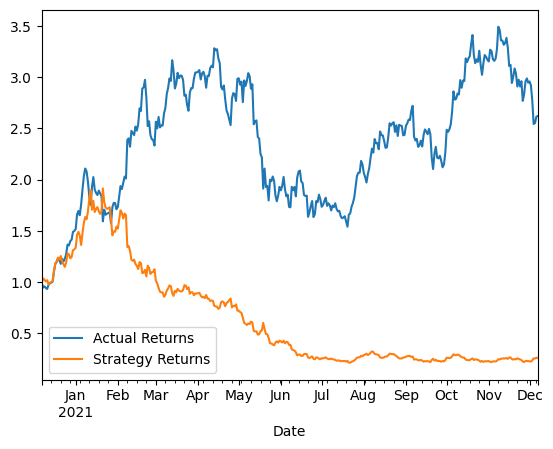

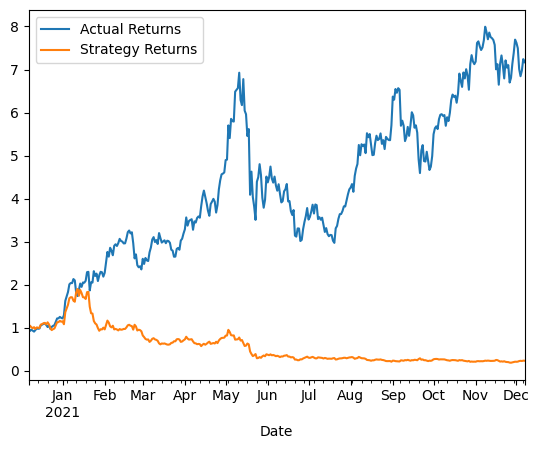

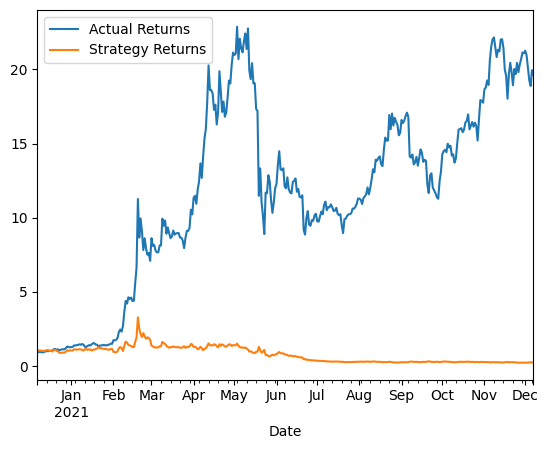

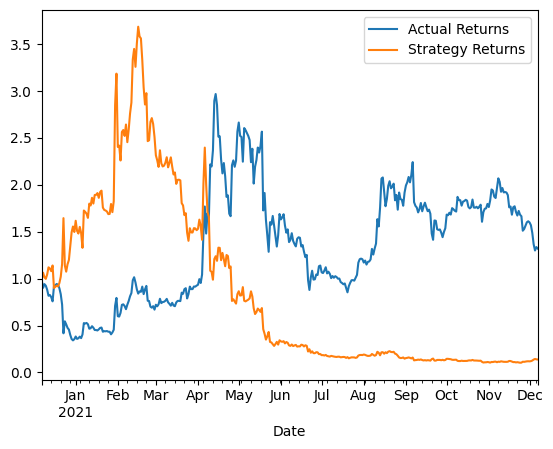

In [48]:
# Plot the actual returns versus the strategy returns
(1 + predictions_df_btc[["Actual Returns", "Strategy Returns"]]).cumprod().plot()
(1 + predictions_df_eth[["Actual Returns", "Strategy Returns"]]).cumprod().plot()
(1 + predictions_df_bnb[["Actual Returns", "Strategy Returns"]]).cumprod().plot()
(1 + predictions_df_xrp[["Actual Returns", "Strategy Returns"]]).cumprod().plot()


In [49]:
# Calculate the points in time when the Signal value changes
# Identify trade entry (1) and exit (-1) points
predictions_df_btc['Entry/Exit'] = predictions_df_btc['signal'].diff()

# Review the DataFrame
predictions_df_btc["Close"] = df_btc["BTC"].copy()
predictions_df_btc

,signal,Actual Returns,Strategy Returns,Entry/Exit,Close
Date,,,,,
2020-12-07,1.0,-0.007934,-0.007934,NaN,1.671256
2020-12-08,1.0,-0.045358,0.045358,0.0,1.595452
2020-12-09,1.0,0.012705,-0.012705,0.0,1.615722
2020-12-10,1.0,-0.015572,-0.015572,0.0,1.590562
2020-12-11,1.0,-0.011283,0.011283,0.0,1.572615
...,...,...,...,...,...
2021-12-03,-1.0,-0.050986,0.050986,0.0,4.667471
2021-12-04,-1.0,-0.082046,0.082046,0.0,4.284522
2021-12-05,-1.0,0.003418,-0.003418,0.0,4.299164


In [50]:
# Visualize exit position relative to close price
exit = predictions_df_btc[predictions_df_btc['Entry/Exit'] == -2.0]['Close'].hvplot.scatter(
    color='red',
    marker='v',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize entry position relative to close price
entry = predictions_df_btc[predictions_df_btc['Entry/Exit'] == 2.0]['Close'].hvplot.scatter(
    color='green',
    marker='^',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize close price for the investment
security_close = predictions_df_btc[['Close']].hvplot(
    line_color='lightgray',
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize moving averages
moving_avgs = predictions_df_btc[['Actual Returns', 'Strategy Returns']].hvplot(
    ylabel='Price in $',
    width=1000,
    height=400
)

# Create the overlay plot
entry_exit_plot = security_close * moving_avgs * entry * exit

# Show the plot with a title
entry_exit_plot.opts(
    title="BTC - Actual Returns, Strategy Returns, Entry and Exit Points"
)

/Users/bpalmy/anaconda3/envs/project2/lib/python3.11/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
/Users/bpalmy/anaconda3/envs/project2/lib/python3.11/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


:Overlay
   .Curve.I          :Curve   [Date]   (Close)
   .NdOverlay.I      :NdOverlay   [Variable]
      :Curve   [Date]   (value)
   .Scatter.Close.I  :Scatter   [Date]   (Close)
   .Scatter.Close.II :Scatter   [Date]   (Close)